In [1]:
import pandas as pd
import json
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import ast

In [ ]:
# Dataframes con los que se trabaja

In [4]:
mm = pd.read_csv('C:\\Users\\rodxf\\Desktop\\Soy Henry\\TAREAS\\P1\\merged_df.csv')

In [7]:
sg = pd.read_csv('C:\\Users\\rodxf\\Desktop\\Soy Henry\\TAREAS\\P1\\steam_games.csv')

In [ ]:
# Reemplazo para todos los generos 'Free to Play' el precio 'price' a 0 

In [26]:
sg.loc[sg['genres'] == 'Free to Play', 'price'] = '0'

## Union entre 'sg' y 'mm.playtime_forever' 

#### La finalidad de este proceso es obtener un dataframe en el cual se realizara la tarea de EDA

In [54]:
mm.head(3)

,genres,title,item_id,year,playtime_forever
0,Racing,Carmageddon Max Pack,282010,1997,9319.0
1,Action,Carmageddon Max Pack,282010,1997,9319.0
2,Classic,Carmageddon Max Pack,282010,1997,9319.0


In [62]:
# selecciono las columnas necesarias para trabajar
mm_time = mm[['item_id', 'playtime_forever']]

,item_id,playtime_forever
0,282010,9319.0
1,282010,9319.0
2,282010,9319.0
3,282010,9319.0
4,282010,9319.0
...,...,...
72716,80,2469131.0
72717,80,2469131.0
72718,80,2469131.0
72719,80,2469131.0


In [56]:
# Inspeccion del DataFrame 'sg'
sg.head(3)

,genres,title,price,specs,item_id,year
0,Strategy,Lost Summoner Kitty,4.99,Single-player,761140.0,2018.0
1,Action,Lost Summoner Kitty,4.99,Single-player,761140.0,2018.0
2,Indie,Lost Summoner Kitty,4.99,Single-player,761140.0,2018.0


In [60]:
sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703298 entries, 0 to 703297
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   genres   703298 non-null  object 
 1   title    703294 non-null  object 
 2   price    683036 non-null  object 
 3   specs    701391 non-null  object 
 4   item_id  703198 non-null  float64
 5   year     700791 non-null  float64
dtypes: float64(2), object(4)
memory usage: 32.2+ MB


In [63]:
# Copia de seguridad
sg_copy = sg.copy()

In [68]:
# Utiliza la función merge() para combinar los DataFrames en base a la columna 'items_id'
df_eda_items = sg_copy.merge( mm_time , on = 'item_id' , how = 'inner' )

In [69]:
df_eda_items

,genres,title,price,specs,item_id,year,playtime_forever
0,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
1,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
2,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
3,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
4,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
...,...,...,...,...,...,...,...
4357762,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357763,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357764,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357765,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0


In [95]:
df_eda_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4357767 entries, 0 to 4357766
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   genres            object 
 1   title             object 
 2   price             object 
 3   specs             object 
 4   item_id           float64
 5   year              float64
 6   playtime_forever  float64
dtypes: float64(3), object(4)
memory usage: 395.0+ MB


In [80]:
# Registros no nulos
df_con_valores_nulos = df_eda_items.dropna(how='any')

In [84]:
df_con_valores_nulos

,genres,title,price,specs,item_id,year,playtime_forever
0,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
1,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
2,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
3,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
4,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
...,...,...,...,...,...,...,...
4357762,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357763,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357764,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357765,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0


In [90]:
# La cantidad de registros con algun valor nulo es despreciable  (0,9% aprox.) y por lo tanto se les descartara
proporcion = 1 - (df_con_valores_nulos.shape[0] /df_eda_items.shape[0]) 
proporcion 

0.00960124761144876

In [91]:
df = df_con_valores_nulos

In [100]:
# Reemplaza varios valores tipo string por 0.0 en la columna 'price' 
df.loc[df['price'] == 'Free', 'price'] = 0.0

In [103]:
df.loc[df['price'] == 'Free to Play', 'price'] = 0.0

In [105]:
df.loc[df['price'] == 'Play for Free!', 'price'] = 0.0

In [107]:
df.loc[df['price'] == 'Free To Play', 'price'] = 0.0

In [111]:
df.loc[df['price'] == 'Install Now', 'price'] = 0.0

In [114]:
df.loc[df['price'] == 'Play WARMACHINE: Tactics Demo'] = 0.0

In [116]:
df.loc[df['price'] == 'Free Mod'] = 0.0

In [118]:
df.loc[df['price'] == 'Free HITMAN™ Holiday Pack'] = 0.0

In [120]:
df.loc[df['price'] == 'Play the Demo'] = 0.0

In [122]:
df.loc[df['price'] == 'Free Movie'] = 0.0

In [126]:
# Elimina los registros donde 'price' es igual a 'Third-party'
df = df[df['price'] != 'Third-party']

In [130]:
# copia de seguridad
df = df.copy()

In [131]:
# Cambio la columna 'price' a tipo float para la estadistica descriptiva
df['price'] = df['price'].astype(float)

In [132]:
# Estadisticas
df.describe(include='all')

,genres,title,price,specs,item_id,year,playtime_forever
count,4315915,4315915,4.315915e+06,4315915,4.315915e+06,4.315915e+06,4.315915e+06
unique,336,7968,NaN,30,NaN,NaN,NaN
top,Indie,BrainBread 2,NaN,Single-player,NaN,NaN,NaN
freq,226486,6800,NaN,844998,NaN,NaN,NaN
mean,NaN,NaN,1.316962e+01,NaN,2.835873e+05,2.011047e+03,2.776237e+06
std,NaN,NaN,1.290085e+01,NaN,1.217255e+05,7.345569e+01,2.685464e+07
min,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.990000e+00,NaN,2.313300e+05,2.013000e+03,7.285000e+03
50%,NaN,NaN,9.990000e+00,NaN,2.955900e+05,2.015000e+03,5.365100e+04
75%,NaN,NaN,1.999000e+01,NaN,3.691100e+05,2.016000e+03,4.328020e+05


### Este Analisis Exploratorio de Datos (EDA), revela la influencia de los diferente juegos y generos respectivamente mediante tres metodos

## Los generos mas jugados, segun 'playtime_forever'

In [136]:
# Agrupar por 'genres' y sumar 'playtime_forever'
df_grouped = df.groupby('genres')['playtime_forever'].sum().reset_index()

# Si deseas ordenar los resultados por la suma en orden descendente, puedes hacerlo así:
df_grouped = df_grouped.sort_values(by='playtime_forever', ascending=False)

In [ ]:
# Calcular el porcentaje acumulado (Analisis de Pareto)
df_grouped['porcentaje_acumulado'] = (df_grouped['playtime_forever'].cumsum() / df_grouped['playtime_forever'].sum()) * 100

In [148]:
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

,genres,playtime_forever,porcentaje_acumulado
0,Action,5.785148e+11,4.828197
1,Multiplayer,5.641530e+11,9.536534
2,Co-op,5.192187e+11,13.869855
3,Singleplayer,4.308137e+11,17.465362
4,Shooter,4.205612e+11,20.975303
...,...,...,...
331,Gaming,1.067030e+05,99.999999
332,Foreign,9.216000e+04,100.000000
333,Feature Film,1.810200e+04,100.000000
334,Hardware,7.623000e+03,100.000000


In [166]:
# # Los generos mas jugados
df_filtrado = df_grouped[df_grouped['porcentaje_acumulado'] < 80]
df_filtrado.tail(4)

,genres,playtime_forever,porcentaje_acumulado
37,Animation & Modeling,9.746178e+10,77.575715
38,Replay Value,9.462520e+10,78.365443
39,Third Person,8.377021e+10,79.064577
40,Free to Play,8.043738e+10,79.735895


#### De 335 generos, 40 son los que tienen el 80% del tiempo de juego

### Diagrama de barras

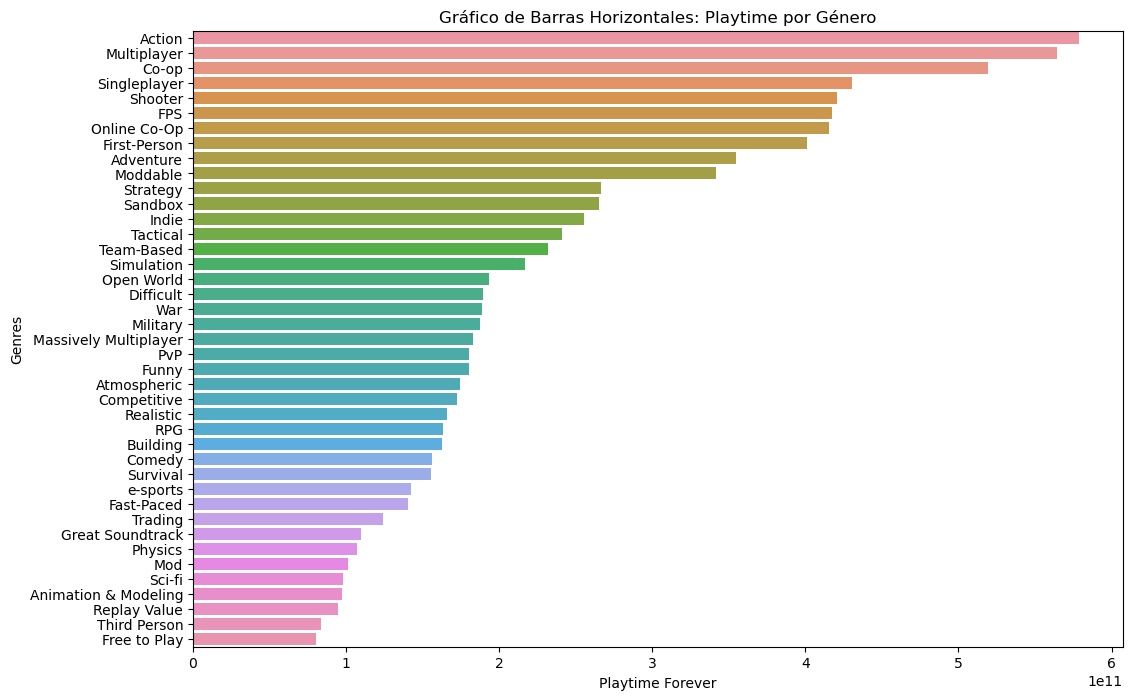

In [151]:
plt.figure(figsize=(12, 8))
sns.barplot(x='playtime_forever', y='genres', data=df_filtrado, orient='h')
plt.xlabel('Playtime Forever')
plt.ylabel('Genres')
plt.title('Gráfico de Barras Horizontales: Playtime por Género')
plt.show()

### Diagrama box-plot del top 5

#### Visualizacion del precio de los generos top 5 mas jugados

In [194]:
top_5 = ['Action' , 'Multiplayer' , 'Co-op' , 'Singleplayer' , 'Shooter']
df_generos_filtrados = df[df['genres'].isin(top_5)].copy()

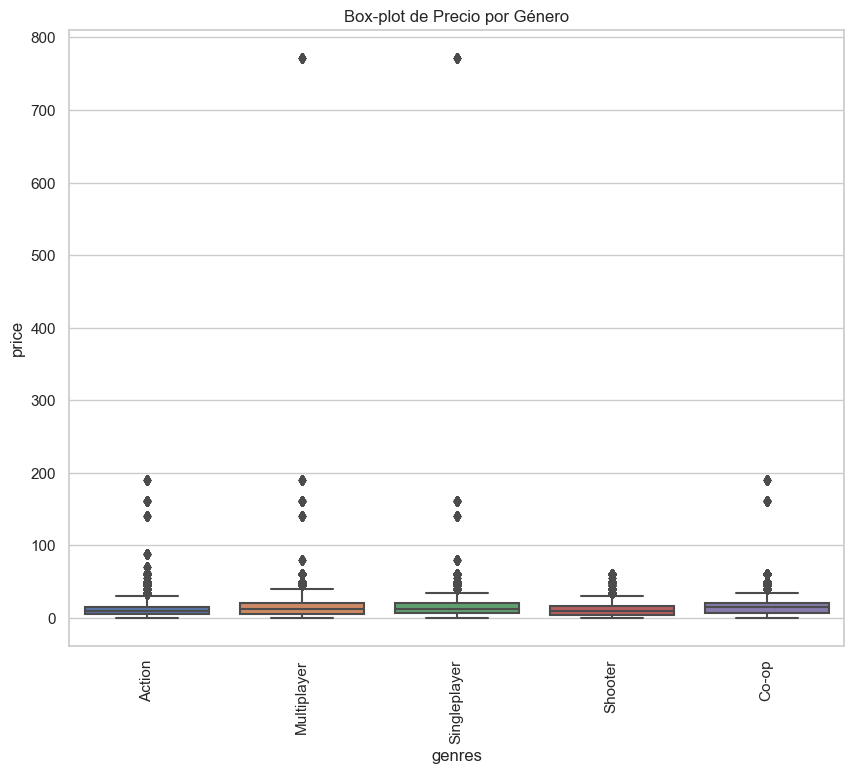

In [203]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea el gráfico de caja
sns.boxplot(x='genres', y='price', data=df_generos_filtrados)

# Rota las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Establece un título para el gráfico
plt.title('Box-plot de Precio por Género')

# Muestra el gráfico
plt.show()

### Diagrama box-plot del top 5 sin outliers

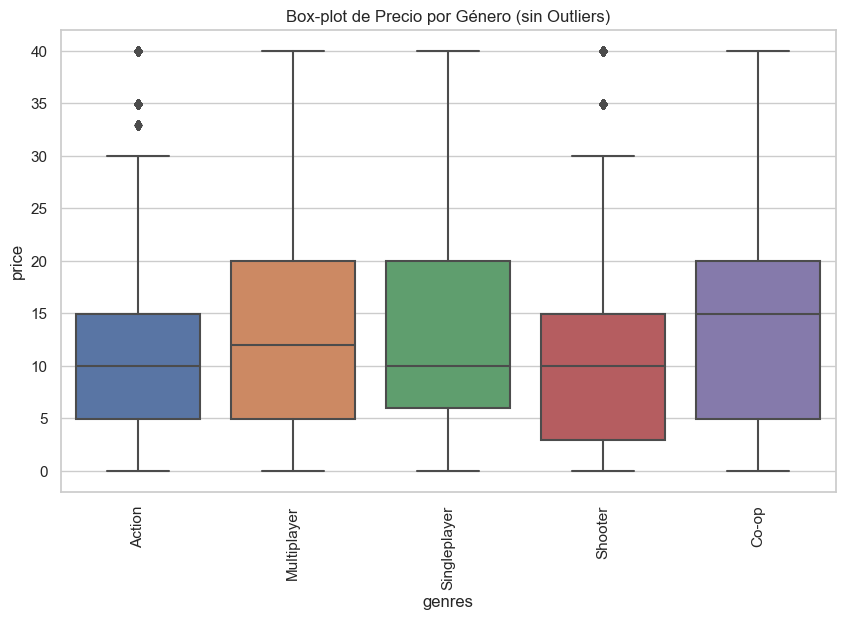

In [212]:
# Calcula el IQR (rango intercuartílico) para 'price'
Q1 = df_generos_filtrados['price'].quantile(0.25)
Q3 = df_generos_filtrados['price'].quantile(0.75)
IQR = Q3 - Q1

# Define un rango aceptable de valores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers
df_sin_outliers = df_generos_filtrados[(df_generos_filtrados['price'] >= limite_inferior) &
                                       (df_generos_filtrados['price'] <= limite_superior)]

# Define el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea el gráfico de caja sin outliers
sns.boxplot(x='genres', y='price', data=df_sin_outliers)

# Rota las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Establece un título para el gráfico
plt.title('Box-plot de Precio por Género (sin Outliers)')

# Muestra el gráfico
plt.show()

##### En esta ultima grafica se puede apreciar que los datos NO siguen un a distribucion normal en cuanto a su precio

## Titulos mas jugados segun 'playtime_forever'

In [214]:
# Agrupar por 'titulo' y sumar 'playtime_forever'
df_grouped_title = df.groupby('title')['playtime_forever'].sum().reset_index()

# Ordenar los resultados por la suma en orden descendente:
df_grouped_title = df_grouped_title.sort_values(by='playtime_forever', ascending=False)

In [215]:
# Calcular el porcentaje acumulado (Analisis de Pareto)
df_grouped_title['porcentaje_acumulado'] = (df_grouped_title['playtime_forever'].cumsum() / df_grouped_title['playtime_forever'].sum()) * 100

In [217]:
df_grouped_title = df_grouped_title.reset_index(drop=True)
df_grouped_title

,title,playtime_forever,porcentaje_acumulado
0,Counter-Strike: Global Offensive,2.482940e+12,20.722244
1,Garry's Mod,1.944233e+12,36.948517
2,Terraria,5.507915e+11,41.545340
3,Left 4 Dead 2,5.261954e+11,45.936888
4,Arma 3,3.705172e+11,49.029169
...,...,...,...
7963,Konung 3: Ties of the Dynasty,2.000000e+00,100.000000
7964,Monster Challenge Circus,1.000000e+00,100.000000
7965,Back To Life 3,1.000000e+00,100.000000
7966,Rooftop Cop,1.000000e+00,100.000000


In [296]:
# Los mas jugados
df_filtrado_title = df_grouped_title[df_grouped_title['porcentaje_acumulado'] < 50]
df_filtrado_title

,title,playtime_forever,porcentaje_acumulado
0,Counter-Strike: Global Offensive,2.482940e+12,20.722244
1,Garry's Mod,1.944233e+12,36.948517
2,Terraria,5.507915e+11,41.545340
3,Left 4 Dead 2,5.261954e+11,45.936888
4,Arma 3,3.705172e+11,49.029169


#### De 7967 titulos, 5 son los que tienen el 50% del tiempo de juego total

### Diagrama de barras acumuladas

#### Responde a que generos pertenece estos 5 titulos 

In [254]:
# Lista de los 5 titulos
lista_de_titulos = df_filtrado_title['title'].unique().tolist()

In [261]:
# Se relacionan los 5 titulos con sus respectivos generos
df_titulos_filtrados = df[df['title'].isin(lista_de_titulos)].copy()
df_titulos_filtrados.drop('specs' , axis = 1 , inplace = True )
df_titulos_filtrados = df_titulos_filtrados.drop_duplicates()

In [272]:
conteo_generos = df_titulos_filtrados['genres'].value_counts()
generos_filtrados = conteo_generos[conteo_generos > 2].index.tolist()
df_titulosxgeneros = df_titulos_filtrados[df_titulos_filtrados['genres'].isin(generos_filtrados)]

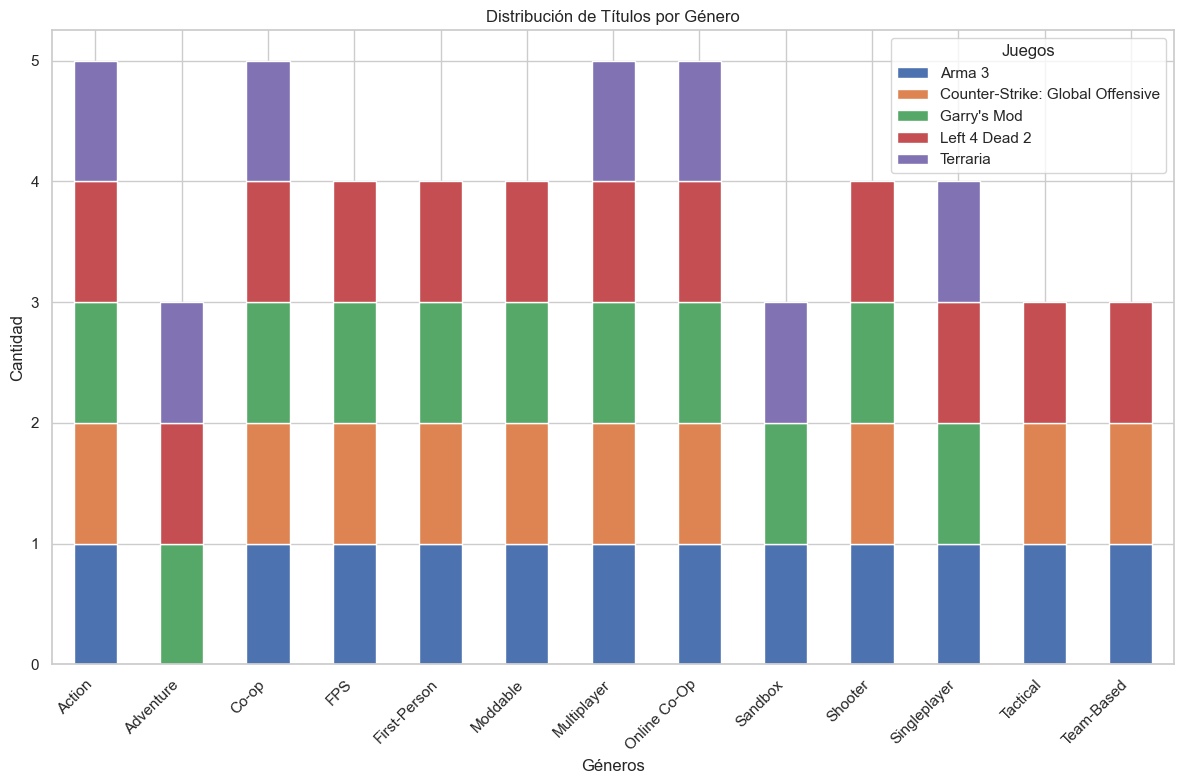

In [294]:
# Grafica de barras acumuladas
# Obtener los generos
top_n_genres = df_titulosxgeneros['genres'].value_counts()

# Filtrar el DataFrame para incluir solo las filas con las categorías más comunes
df_filtered = df_titulosxgeneros[df_titulosxgeneros['genres'].isin(top_n_genres.index)]

# Crear una tabla de contingencia de las dos variables
contingency_table = pd.crosstab(df_filtered['genres'], df_filtered['title'])

# Crear el gráfico de barras apiladas
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Personalizar etiquetas y título
plt.xlabel('Géneros')
plt.ylabel('Cantidad')
plt.title('Distribución de Títulos por Género')

# Rotar etiquetas en el eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.legend(title='Juegos')
plt.tight_layout()
plt.show()


#### Algunos de los generos de este analisis coinciden con el analisis anterior

## Los generos mas vendidos

#### Analisis realizado contando las veces que se repiten los generos en el DataFrame 

In [158]:
# conteo de los generos
conteo_generos = df['genres'].value_counts()
conteo_generos

Indie               226486
Action              213065
Singleplayer        190296
Adventure           172654
Multiplayer         121843
                     ...  
Photo Editing           60
Underground             57
Audio Production        26
Hardware                21
Feature Film            14
Name: genres, Length: 336, dtype: int64

In [162]:
# Calcula el porcentaje acumulado
porcentaje_acumulado = (conteo_generos / conteo_generos.sum() * 100).cumsum()

# Crea un DataFrame con los géneros y su porcentaje acumulado
df_porcentaje_acumulado = pd.DataFrame({'Género': conteo_generos.index, 'Conteo': conteo_generos.values, 'porcentaje_acumulado': porcentaje_acumulado.values})

In [231]:
# Los generos mas vendidos (Analisis de Pareto) 
df_filtrado = df_porcentaje_acumulado[df_porcentaje_acumulado['porcentaje_acumulado'] < 80]
df_filtrado

,Género,Conteo,porcentaje_acumulado
0,Indie,226486,5.247694
1,Action,213065,10.184422
2,Singleplayer,190296,14.593591
3,Adventure,172654,18.593995
4,Multiplayer,121843,21.417104
...,...,...,...
74,Survival Horror,13027,78.660354
75,Stealth,12736,78.955447
76,Historical,12505,79.245189
77,Physics,12502,79.534861


In [207]:
# Los mas vendidos top 5
df_filtrado = df_porcentaje_acumulado[df_porcentaje_acumulado['porcentaje_acumulado'] < 80]
df_filtrado.head(5)

,Género,Conteo,porcentaje_acumulado
0,Indie,226486,5.247694
1,Action,213065,10.184422
2,Singleplayer,190296,14.593591
3,Adventure,172654,18.593995
4,Multiplayer,121843,21.417104


#### De 335 generos, 79 corresponden al 80% de las ventas

### Precio promedio por genero y especificaciones de steam del top 5 mas vendidos

In [204]:
top_5 = ['Indie' , 'Action' , 'Singleplayer' ,'Adventure' , 'Multiplayer']
df_generos_filtrados2 = df[df['genres'].isin(top_5)].copy()

In [205]:
df_generos_filtrados2.groupby (['genres','specs'])['price'].mean()

genres        specs                     
Action        Captions available            12.075878
              Co-op                         13.529351
              Commentary available          11.129262
              Cross-Platform Multiplayer    10.610474
              Downloadable Content           9.243731
                                              ...    
Singleplayer  Steam Leaderboards            13.629344
              Steam Trading Cards           13.421056
              Steam Turn Notifications      10.835620
              Steam Workshop                19.036161
              Valve Anti-Cheat enabled      20.026775
Name: price, Length: 139, dtype: float64

### Moda del precio por genero y especificaciones de steam del top 5 mas vendidos

In [211]:
 df_generos_filtrados2.groupby(['genres', 'specs'])['price'].apply(lambda x: x.mode().tolist())

genres        specs                     
Action        Captions available            [9.99, 19.99]
              Co-op                                 [0.0]
              Commentary available                [19.99]
              Cross-Platform Multiplayer            [0.0]
              Downloadable Content                 [9.99]
                                                ...      
Singleplayer  Steam Leaderboards                   [9.99]
              Steam Trading Cards                  [9.99]
              Steam Turn Notifications        [0.0, 9.99]
              Steam Workshop                      [14.99]
              Valve Anti-Cheat enabled            [19.99]
Name: price, Length: 139, dtype: object

## CVS Para el modelo de ML

#### La creacion del CSV correspondiente al modelo de ML se desarrollo en esta etapa debido a que las columnas relevantes son las consideradas en la etapa de Analisis exploratorio de Datos (EDA) 

In [3]:
# Leer el contenido del archivo output_steam_games.json

data = []
with open('output_steam_games.json') as f:
    for line in f:
        data.append(json.loads(line))

In [149]:
df = pd.DataFrame(data)

In [150]:
# Seleccion de las columnas que se necesitan
df = df[['title' , 'tags']]

In [151]:
# Elimino los registros innecesarios
df = df.dropna()

In [152]:
df

,title,tags
88310,Lost Summoner Kitty,"[Strategy, Action, Indie, Casual, Simulation]"
88311,Ironbound,"[Free to Play, Strategy, Indie, RPG, Card Game..."
88312,Real Pool 3D - Poolians,"[Free to Play, Simulation, Sports, Casual, Ind..."
88313,弹炸人2222,"[Action, Adventure, Casual]"
88315,Battle Royale Trainer,"[Action, Adventure, Simulation, FPS, Shooter, ..."
...,...,...
120439,Kebab it Up!,"[Action, Indie, Casual, Violent, Adventure]"
120440,Colony On Mars,"[Strategy, Indie, Casual, Simulation]"
120441,LOGistICAL: South Africa,"[Strategy, Indie, Casual]"
120442,Russian Roads,"[Indie, Simulation, Racing]"


In [153]:
# Agregacion de variables dummies
# Paso 1: Convierte las listas en cadenas de texto
df['tags'] = df['tags'].apply(lambda x: ','.join(x))

# Paso 2: Crea variables dummies
tags_dummies = df['tags'].str.get_dummies(',')

# Combina las variables dummies con el DataFrame original
df = pd.concat([df, tags_dummies], axis=1)

# Ahora df contendrá las variables dummies de las etiquetas en la columna "tags"


In [155]:
# Elimino las columnas innecesarias
df.drop( columns = 'tags' , axis = 1 , inplace = True)

In [158]:
(tags_games_df.sum().sort_values(ascending = False).head(20)/ len(tags_games_df))*100

Indie               10.334651
Action               7.596022
Adventure            5.830385
Casual               5.593916
Strategy             4.642364
Simulation           4.446252
RPG                  3.656760
Singleplayer         2.656022
Multiplayer          1.444039
Free to Play         1.412510
Great Soundtrack     1.375936
Puzzle               1.268736
2D                   1.225856
Atmospheric          1.163429
Early Access         0.921915
Platformer           0.905520
Story Rich           0.894169
Fantasy              0.843092
Sports               0.833002
Sci-fi               0.819760
dtype: float64

In [174]:
# Seleccion de las columnas de las variables dummies
etiquetas = tags_games_df.sum().sort_values(ascending=False).head(20).index
etiquetas = pd.Index(['title']).append(etiquetas)

In [175]:
etiquetas

Index(['title', 'Indie', 'Action', 'Adventure', 'Casual', 'Strategy',
       'Simulation', 'RPG', 'Singleplayer', 'Multiplayer', 'Free to Play',
       'Great Soundtrack', 'Puzzle', '2D', 'Atmospheric', 'Early Access',
       'Platformer', 'Story Rich', 'Fantasy', 'Sports', 'Sci-fi'],
      dtype='object')

### DataFrame para el modelo de ML

In [177]:
df1 = df[etiquetas]

In [178]:
df1

,title,Indie,Action,Adventure,Casual,Strategy,Simulation,RPG,Singleplayer,Multiplayer,...,Great Soundtrack,Puzzle,2D,Atmospheric,Early Access,Platformer,Story Rich,Fantasy,Sports,Sci-fi
88310,Lost Summoner Kitty,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88311,Ironbound,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
88312,Real Pool 3D - Poolians,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
88313,弹炸人2222,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88315,Battle Royale Trainer,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120439,Kebab it Up!,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120440,Colony On Mars,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120441,LOGistICAL: South Africa,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120442,Russian Roads,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29924 entries, 88310 to 120443
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             29924 non-null  object
 1   Indie             29924 non-null  int64 
 2   Action            29924 non-null  int64 
 3   Adventure         29924 non-null  int64 
 4   Casual            29924 non-null  int64 
 5   Strategy          29924 non-null  int64 
 6   Simulation        29924 non-null  int64 
 7   RPG               29924 non-null  int64 
 8   Singleplayer      29924 non-null  int64 
 9   Multiplayer       29924 non-null  int64 
 10  Free to Play      29924 non-null  int64 
 11  Great Soundtrack  29924 non-null  int64 
 12  Puzzle            29924 non-null  int64 
 13  2D                29924 non-null  int64 
 14  Atmospheric       29924 non-null  int64 
 15  Early Access      29924 non-null  int64 
 16  Platformer        29924 non-null  int64 
 17  Story R

In [180]:
# Utiliza to_csv() para guardar el DataFrame como un archivo CSV
df1.to_csv('ml_df.csv', index=False)